Machine Learning & Computational Machine Learning

COSC 2673 & COSC 2793

Assignment 2

Student IDs

Aparupa Mitra : s3831724

Shristi Shelendra Chavhan : s3822713

Project 1: Classify Images of Colon Cancer

Assume you are a team of machine learning engineers working for a biomedical startup
company. Your task is to develop a machine learning system that can classify histopath-
elogy images of colon cells. A basic description of histopathelogy images can be found
here.
You will be using a modified version of the \CRCHistoPhenotypes" dataset for this
task. The data set for you to use in this assignment has been speciacally prepared for
you, and is provided on Canvas. The dataset consists of 27x27 RGB images of colon cells
from 99 different patients and you are expected to use the dataset to perform two tasks:

• Classify images according to whether given cell image represents a cancerous cells
or not (isCancerous).

• Classify images according to cell-type, such as: fibroblast, inflammatory,
epithelial or others.

# TASK 1

Task 1 : Classify images according to whether given cell image represents a cancerous cells
or not (isCancerous).

Here we will combine two both csv files data_labels_mainData.csv and data_labels_extraData.csv for building the model capable of predicting a patient cancer or not . We will use ModelCheckPoint() to save the weight of the model and use these weights in prediction cell types which will be build for  Task 2 .
We will use the concept of Transfer learning  which is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with zipfile.ZipFile('./patch_images.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [3]:
predict_cancerous= pd.read_csv('./data_labels_mainData.csv')



In [4]:
predict_cancerous

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


# IMAGE EXPLORATION 

View images of different cell types.We have four cell types :fibroblast,inflammatory,epithelial,others. We will view images from different perspectives.

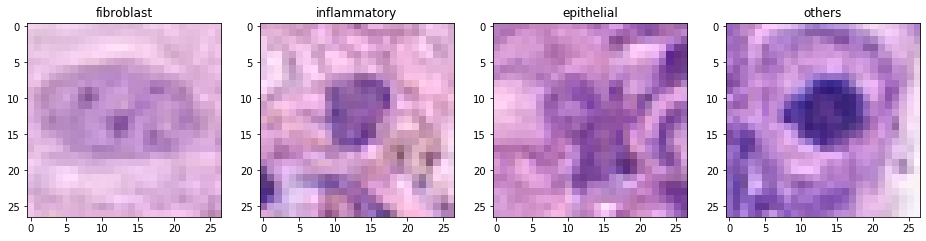

In [5]:
# Now let us view some images of different cell types

from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))


plt.subplot(1,4,1)
image =imread('./patch_images/22405.png', as_gray=False, plugin=None)
plt.title("fibroblast")
# Plot image
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('on')

plt.subplot(1,4,2)
image =imread('./patch_images/22417.png', as_gray=False, plugin=None)
plt.title("inflammatory")
# Plot image
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('on')



plt.subplot(1,4,3)
image =imread('./patch_images/4735.png', as_gray=False, plugin=None)
plt.title("epithelial")
# Plot image
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('on')


plt.subplot(1,4,4)
image =imread('./patch_images/8690.png', as_gray=False, plugin=None)
plt.title("others")
# Plot image
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('on')
plt.show()

Let us go for edge detection of all four types of cancerous cell

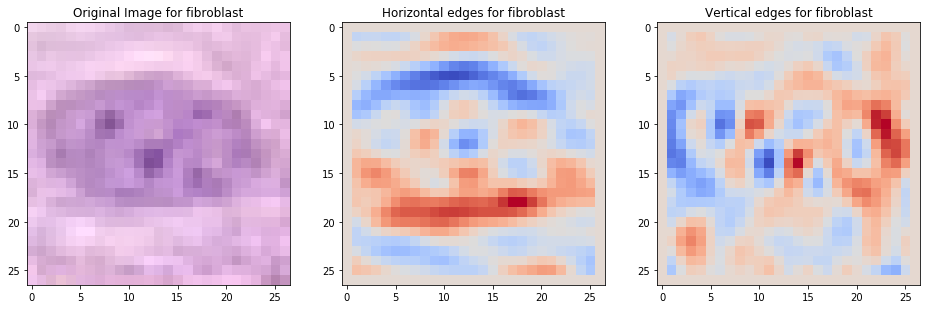

In [6]:
from skimage import filters
from skimage.color import rgba2rgb, rgb2gray
from skimage.filters import gaussian

image =imread('./patch_images/22405.png', as_gray=False, plugin=None)

grayscale = rgb2gray(image)
gaussian_filter = gaussian(grayscale, sigma=1)
sobel_edge_horizontal = filters.sobel_h(gaussian_filter)
sobel_edge_verticle= filters.sobel_v(gaussian_filter)

# Plot image
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.axis('on')
plt.imshow(image)
plt.title("Original Image for fibroblast")

plt.subplot(1,3,2)
plt.imshow(sobel_edge_horizontal, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Horizontal edges for fibroblast")
plt.subplot(1,3,3)
plt.imshow(sobel_edge_verticle, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Vertical edges for fibroblast")
plt.show()

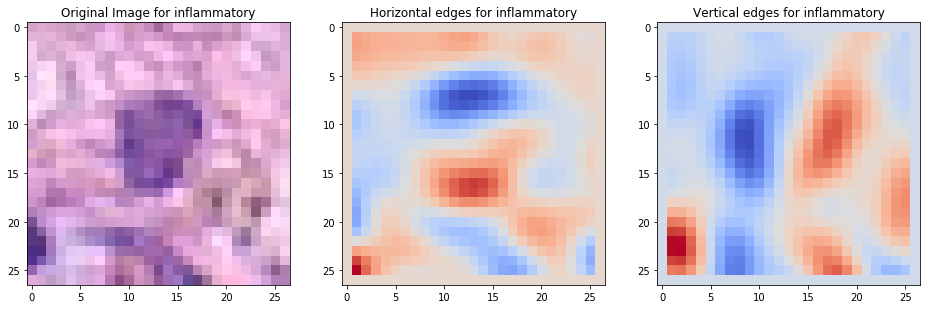

In [7]:

image =imread('./patch_images/22417.png', as_gray=False, plugin=None)

grayscale = rgb2gray(image)
smooth_image = gaussian(grayscale, sigma=2)
edge_sobel_horizontal = filters.sobel_h(smooth_image)
edge_sobel_verticle = filters.sobel_v(smooth_image)

# Plot image
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.axis('on')
plt.imshow(image)
plt.title("Original Image for inflammatory")

plt.subplot(1,3,2)
plt.imshow(edge_sobel_horizontal, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Horizontal edges for inflammatory")
plt.subplot(1,3,3)
plt.imshow(edge_sobel_verticle, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Vertical edges for inflammatory")
plt.show()

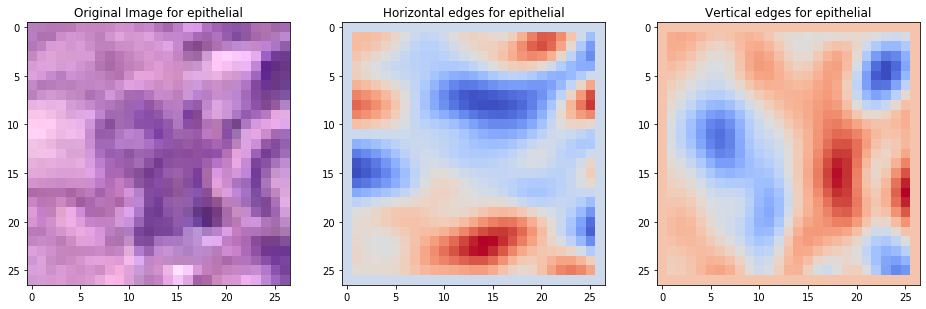

In [8]:

image =imread('./patch_images/4735.png', as_gray=False, plugin=None)

grayscale = rgb2gray(image)
smooth_image = gaussian(grayscale, sigma=2)
edge_sobel_horizontal = filters.sobel_h(smooth_image)
edge_sobel_verticle = filters.sobel_v(smooth_image)

# Plot image
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.axis('on')
plt.imshow(image)
plt.title("Original Image for epithelial")

plt.subplot(1,3,2)
plt.imshow(edge_sobel_horizontal, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Horizontal edges for epithelial")
plt.subplot(1,3,3)
plt.imshow(edge_sobel_verticle, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Vertical edges for epithelial")
plt.show()

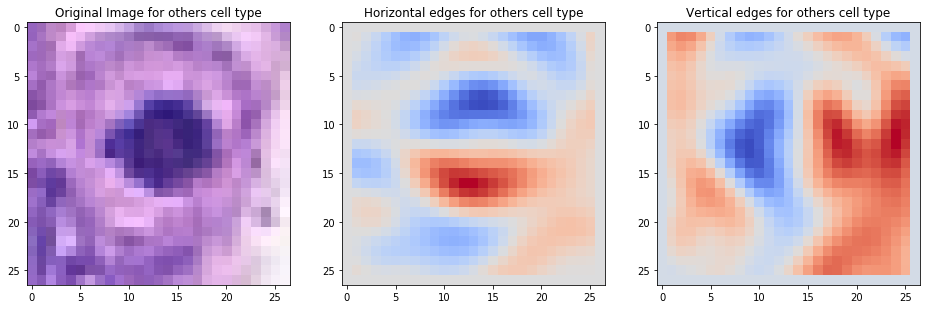

In [9]:
image =imread('./patch_images/8690.png', as_gray=False, plugin=None)

grayscale = rgb2gray(image)
smooth_image = gaussian(grayscale, sigma=2)
edge_sobel_hori = filters.sobel_h(smooth_image)
edge_sobel_verti = filters.sobel_v(smooth_image)

# Plot image
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.axis('on')
plt.imshow(image)
plt.title("Original Image for others cell type")

plt.subplot(1,3,2)
plt.imshow(edge_sobel_hori, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Horizontal edges for others cell type")
plt.subplot(1,3,3)
plt.imshow(edge_sobel_verti, cmap=plt.cm.coolwarm)
plt.axis('on')
plt.title("Vertical edges for others cell type")
plt.show()

Now we will proceed for Task 1 that is to classify images according to whether given cell image represents a cancerous cells
or not.

We will combine two dataset data_labels_mainData.csv and  data_labels_extraData.csv and use it in Task 1 to build model to detect iscancerous or not

In [10]:
predict_cancerous = predict_cancerous.drop(['cellTypeName','cellType'],axis =1)
predict_cancerous

,InstanceID,patientID,ImageName,isCancerous
0,22405,1,22405.png,0
1,22406,1,22406.png,0
2,22407,1,22407.png,0
3,22408,1,22408.png,0
4,22409,1,22409.png,0
...,...,...,...,...
9891,1625,60,1625.png,1
9892,1626,60,1626.png,1
9893,1627,60,1627.png,1
9894,1628,60,1628.png,1


In [11]:
extradata = pd.read_csv('./data_labels_extraData.csv')
extradata

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [12]:
Combined = pd.concat([predict_cancerous,extradata])
Combined 

,InstanceID,patientID,ImageName,isCancerous
0,22405,1,22405.png,0
1,22406,1,22406.png,0
2,22407,1,22407.png,0
3,22408,1,22408.png,0
4,22409,1,22409.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [13]:
# since we need to classify images cancerousor not ,so we have only 2 class. 

OUTPUT_CLASSES = 2 
train_data, test_data = train_test_split(Combined, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 12168, Val Data: 4056, Test Data: 4056


0    13211
1     7069
Name: isCancerous, dtype: int64


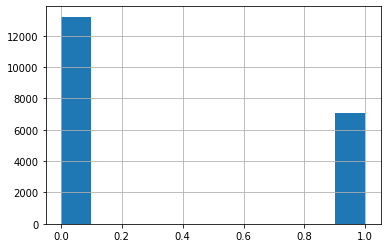

In [14]:
# Lets check the class

print(Combined['isCancerous'].value_counts())
Combined.isCancerous.hist()
plt.show()

We will use ImageDataGenerator to perform data transformation on the images.
Through ImageDataGenerator one can apply any kind of transformations on images as it is passed to the model. This will not only make the model robust, but saves up on the overhead memory.
Here we will apply ImageDataGenerator to all train test and validation data

In [15]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')
test_data['isCancerous'] = test_data['isCancerous'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

test_datagen =ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

C:\Users\aparu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Found 12168 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.


Create a tf.keras.callbacks.ModelCheckpoint callback that saves weights only during training. ModelCheckPoint saves the important parameters like weights of model at that point.

In [16]:

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import os

checkpoint_path = "./Checkpoint/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

First we will build model for prediction cancer. We will try to find out the best model (check if  baseline model if the best or its regularized or augmented model is best or not).

Once best model is selected , we will save its weight by calling callback in .fit() method.

# DATA MODELLING TO PREDICT PATIENT HAVING CANCER OR NOT

# Baseline Model

In [17]:
# Modelling 


import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [18]:
# Default Baseline Model

import tensorflow as tf


model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

Instructions for updating:
Please use Model.fit, which supports generators.


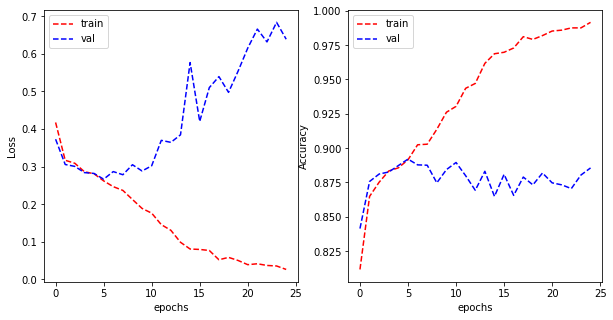

In [20]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_1 = model_1.fit_generator(train_generator, validation_data = validation_generator,
                                  epochs=25, verbose=0)

plot_learning_curve(history_1.history['loss'], history_1.history['val_loss'], 
                    history_1.history['categorical_accuracy'], history_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

From the above plot ,we can see that validation loss increases and validation accuracy does not improves with number of epochs,therefore we will try to regularize it and see how accuracy improves.

# Regularization /Parameter tuning

In regualized model ,we will provide lambda value =0.001 , optimizer = Adam ,Dropout = 0.2.

In [21]:



reg_lambda = 0.001

model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
   
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])


In [22]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)        

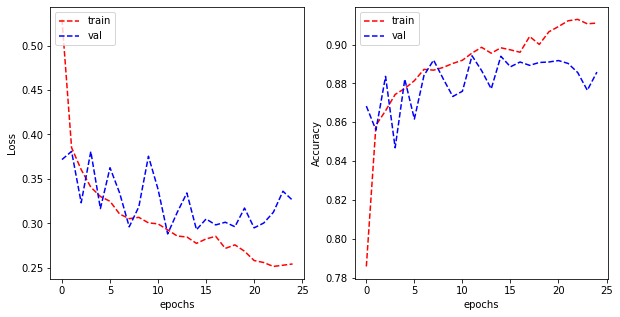

In [23]:

model_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_2 = model_2.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)
plot_learning_curve(history_2.history['loss'], history_2.history['val_loss'], 
                    history_2.history['categorical_accuracy'], history_2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

From the above plot we can see that after applying regularization, validation and traning loss decreases and accuracy for both increases .Now we will try to perform data augmentation and see if further improvements could be done in model.

# Data Augmentation

In data augmentation we will provide follwing parameters in model

lambda =0.001

optimizer =Adam

Dropout = 0.2


In [24]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')
test_data['isCancerous'] = test_data['isCancerous'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

test_datagen =ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

C:\Users\aparu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Found 12168 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.


In [25]:
reg_lambda = 0.001

model_final = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
   
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [26]:
model_final.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)        

In [27]:
model_final.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_3 = model_final.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)


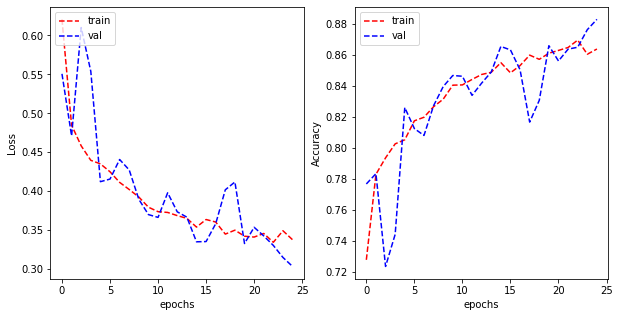

In [28]:
plot_learning_curve(history_3.history['loss'], history_3.history['val_loss'], 
                    history_3.history['categorical_accuracy'], history_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

We can see that this model tends towards high accuracy with few downs. We will proceed wth this model and will try to predict on test data.

In [29]:
# Apply on test and train data to predict accuracy of both

predict = model_final.predict(test_generator)

test_evaluation = model_final.evaluate(test_generator)
print(f"Test Accuracy: {test_evaluation[1] * 100:.2f}%")


train_evaluation = model_final.evaluate(train_generator)
print(f"Train Accuracy: {train_evaluation[1] * 100:.2f}%")

127/127 [==============================] - 5s 36ms/step - loss: 0.3038 - categorical_accuracy: 0.8809
Test Accuracy: 88.09%
381/381 [==============================] - 30s 80ms/step - loss: 0.3181 - categorical_accuracy: 0.8764
Train Accuracy: 87.64%


So we can see that test accuracy has improved and is nearly train accuracy .Hence our final model can predict well with unknown dataset to determine if that data /image is cancerous or not.

So we will try to save this model weights by implementing callbacks inside.fit().

In [30]:
model_final.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_3 = model_final.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0,callbacks=[cp_callback])



Epoch 00001: saving model to ./Checkpoint\

Epoch 00002: saving model to ./Checkpoint\

Epoch 00003: saving model to ./Checkpoint\

Epoch 00004: saving model to ./Checkpoint\

Epoch 00005: saving model to ./Checkpoint\

Epoch 00006: saving model to ./Checkpoint\

Epoch 00007: saving model to ./Checkpoint\

Epoch 00008: saving model to ./Checkpoint\

Epoch 00009: saving model to ./Checkpoint\

Epoch 00010: saving model to ./Checkpoint\

Epoch 00011: saving model to ./Checkpoint\

Epoch 00012: saving model to ./Checkpoint\

Epoch 00013: saving model to ./Checkpoint\

Epoch 00014: saving model to ./Checkpoint\

Epoch 00015: saving model to ./Checkpoint\

Epoch 00016: saving model to ./Checkpoint\

Epoch 00017: saving model to ./Checkpoint\

Epoch 00018: saving model to ./Checkpoint\

Epoch 00019: saving model to ./Checkpoint\

Epoch 00020: saving model to ./Checkpoint\

Epoch 00021: saving model to ./Checkpoint\

Epoch 00022: saving model to ./Checkpoint\

Epoch 00023: saving model to ./

In [31]:
#creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch

os.listdir(checkpoint_dir) 

['.data-00000-of-00001',
 '.index',
 'checkpoint',
 '_temp_d3b51039c95c49f5967162fbb8302b91']

# TASK 2


TASK 2 : Classify images according to cell-type, such as: fibroblast, inflammatory,
epithelial or others.

Here cellType have been numbered for following cell names 

fibroblast - 0

inflammatory - 1

epithelial - 2

others - 3

In [32]:
with zipfile.ZipFile('./patch_images.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [33]:
data = pd.read_csv('./data_labels_mainData.csv')

# since we need to classify images cell type ,so we have only 4 class. 

OUTPUT_CLASSES = 4 
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


In [34]:
train_data.shape

(5937, 6)

In [35]:
val_data.shape

(1979, 6)

In [36]:
test_data.shape

(1980, 6)

In [37]:
data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [38]:
data = data.drop(['cellTypeName','isCancerous'],axis =1)
data

,InstanceID,patientID,ImageName,cellType
0,22405,1,22405.png,0
1,22406,1,22406.png,0
2,22407,1,22407.png,0
3,22408,1,22408.png,0
4,22409,1,22409.png,0
...,...,...,...,...
9891,1625,60,1625.png,2
9892,1626,60,1626.png,2
9893,1627,60,1627.png,2
9894,1628,60,1628.png,2


2    4079
1    2543
0    1888
3    1386
Name: cellType, dtype: int64


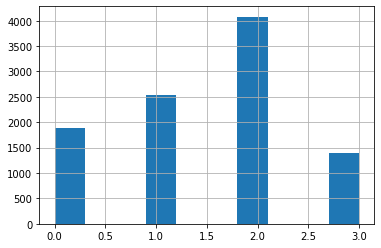

In [39]:
# Lets us check classes

print(data['cellType'].value_counts())
data.cellType.hist()
plt.show()

We can see that except class2, more or less all classes does not ahve much difference in counts .So we will not carry out class balancing here.

# DATA MODELLING TO CLASSIFY CELL TYPES

ImageDataGenerator is used order to improve the performance and ability of the model to generalize.Hence we will apply ImageDataGenerator to all train ,validation and test dataset

In [40]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')
test_data['cellType'] = test_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

test_datagen =ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

C:\Users\aparu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.
Found 1980 validated image filenames belonging to 4 classes.


In [41]:
# modelling 



import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

# Baseline Model

In [42]:
# Default Baseline Model

import tensorflow as tf


model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [43]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)        

In [44]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

history_1 = model_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)



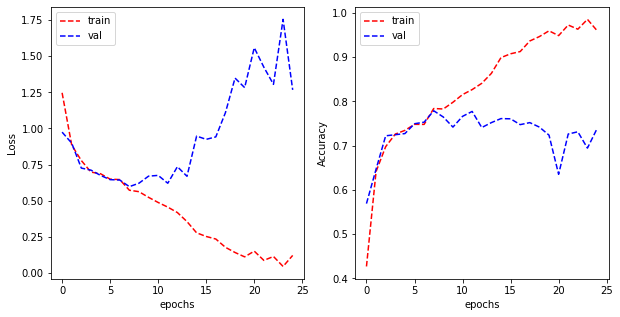

In [45]:
plot_learning_curve(history_1.history['loss'], history_1.history['val_loss'], 
                    history_1.history['categorical_accuracy'], history_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

From above plots we can see second plot shows overfitting as as traning accuracy increases, validation accuracy decreases. So we need to perform regularization.

# Regularization /Parameter tuning

In [46]:



reg_lambda = 0.001

model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
   
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])


In [47]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 128)        

In [48]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_2 = model_2.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)


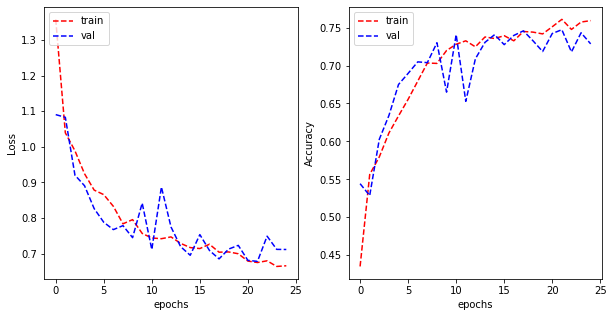

In [49]:

plot_learning_curve(history_2.history['loss'], history_2.history['val_loss'], 
                    history_2.history['categorical_accuracy'], history_2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

From the above plot there has been wide gap between train and validation data .We will try to perform data augmentation .we will randomly repostion the original dataset to form a larger dataset and use that for training.

# Data Augmentation

We will add the following parameters to data augmented model 

lambda =0.001

optimizer = adam

Dropout = 0.2

In [50]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')
test_data['cellType'] = test_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

test_datagen =ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

C:\Users\aparu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.
Found 1980 validated image filenames belonging to 4 classes.


In [51]:
reg_lambda = 0.001

model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    
    tf.keras.layers.MaxPooling2D((2, 2)),
    
   
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
   
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [52]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 128)        

In [53]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_3 = model_3.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)


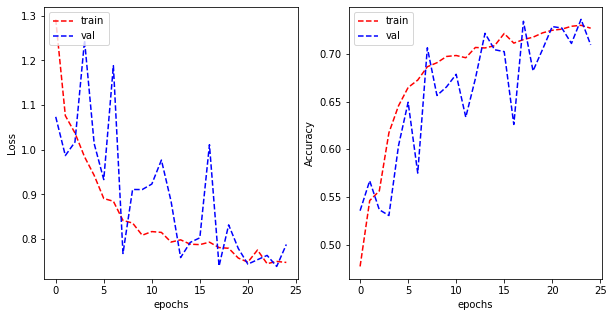

In [54]:
plot_learning_curve(history_3.history['loss'], history_3.history['val_loss'], 
                    history_3.history['categorical_accuracy'], history_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

After applying batch normalization in data augmentation ,we can see that curve has improved. Validation accuray has increased a lot and validation loss has decresed .So we will go with model 3 and predict test data 

In [55]:
# Apply on test and train data to predict accuracy of both

prediction = model_3.predict(test_generator)

test_evaluation = model_3.evaluate(test_generator)
print(f"Test Accuracy: {test_evaluation[1] * 100:.2f}%")


train_evaluation = model_3.evaluate(train_generator)
print(f"Train Accuracy: {train_evaluation[1] * 100:.2f}%")

62/62 [==============================] - 1s 23ms/step - loss: 0.8419 - categorical_accuracy: 0.6960
Test Accuracy: 69.60%
186/186 [==============================] - 9s 48ms/step - loss: 0.7117 - categorical_accuracy: 0.7447
Train Accuracy: 74.47%


We can see that the model outputs good accuracy for both test and train data.Test data prediction score more than 70% around accuracy which is quite good .Hence this model ca be used to classify unseen dataset 

# For higher grades (HD/DI) you must explore how the data in\data labels extraData.csv" can improve the cell-type classification model and use it accordingly.

                
For this task  we will use the concept of Transfer learning  which is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.
We have already  use the combined dataset for task 1, save its weights and load the weights for task 2 model.

Steps are as follows:

1.Here first merge both csv files data_labels_mainData.csv  and data_labels_extraData.csv (dropping cellTypeName and cellType columns). 

2.We creates a tf.keras.callbacks.ModelCheckpoint callback that saves weights only during training.

3.Then we used already combined dataset in our Task 1  model that predict iscancerous or not.

4.Build  our second Task model ( which detects four  cell type) and evaluated.

NOW WE WILL PERFORM BELOW STEPS

5.Loaded the weights from the first task ( load the weights from the checkpoint) using model_final.load_weights(checkpoint_path)

6.Use get_weights() and set_weights() function to adjust weights .

Hence  data in \data labels extraData.csv" can improve the cell-type classification model and can be use it accordingly.

Since there is shape diffrence while transfer the pretrained model weight,as task1  model as shape (,2) and task 2 model has (,4) ,so we will use loop through layers in model . We will use get_weights() in each layer and transfer to the new layers with set_weights(weights)


model.layer.get_weights()returns a list consisting of NumPy arrays. The first array gives the weights of the layer and the second array gives the biases.

model.layer.set_weights(weights) sets the weights and biases of the layer from a list consisting of NumPy arrays with shape same as returned by get_weights().

In [56]:
# Load weights from first task model

model_final.load_weights(checkpoint_path)

In [57]:

for i in range(len(model_final.layers)-1):  # excluding last layer of model
    model_3.layers[i].set_weights(model_final.layers[i].get_weights())

In [58]:
# Re-evaluate the model
prediction = model_3.predict(test_generator)

test_evaluation = model_3.evaluate(test_generator)
print(f"Test Accuracy: {test_evaluation[1] * 100:.2f}%")


train_evaluation = model_3.evaluate(train_generator)
print(f"Train Accuracy: {train_evaluation[1] * 100:.2f}%")

62/62 [==============================] - 2s 24ms/step - loss: 1.3982 - categorical_accuracy: 0.4747
Test Accuracy: 47.47%
186/186 [==============================] - 10s 52ms/step - loss: 1.3818 - categorical_accuracy: 0.4903
Train Accuracy: 49.03%


Although after applying transfer learning for this dataset, the traning and test accuracy did not perform well,but we are able to use the weights of one model into another. This way we can use data_labels_extraData.csv which contained only labelled iscancerous classes in determining cell type classification model.